In [3]:
cd(".."); include("init.jl");

In [61]:
include("examples/mnist_nn.jl"); include("src/utils/chain_stats.jl")

compute_bias2_var (generic function with 2 methods)

In [3]:
sgrhmc_1_10_bv = eval_chains([0.00001, 0.00003, 0.0001,0.0003,0.001], num_iterations=20000, lsteps=8, sampler=SGMCMC.sgrhmc!, batchsize=100, preprocess=:pca, mass=[1.0], c=[10.0]);

In [64]:
# evaluate 
sgrhmc_10_10_bv = eval_chains([0.0003,0.001, 0.003, 0.01, 0.03, 0.01], num_iterations=20000, lsteps=8, sampler=SGMCMC.sgrhmc!, batchsize=100, preprocess=:pca, mass=[10.0], c=[10.0]);
sgrhmc_10_1_bv = eval_chains([0.0003,0.001, 0.003, 0.01, 0.03, 0.01], num_iterations=20000, lsteps=8, sampler=SGMCMC.sgrhmc!, batchsize=100, preprocess=:pca, mass=[10.0], c=[1.0]);
sglda_bv = eval_chains([0.0000001, 0.0000003, 0.000001,0.000003,0.00001], num_iterations=20000, lsteps=8, sampler=SGMCMC.sglda!, batchsize=100, preprocess=:pca, mass=[1.0], c=[1.0]);

In [6]:
using PyPlot

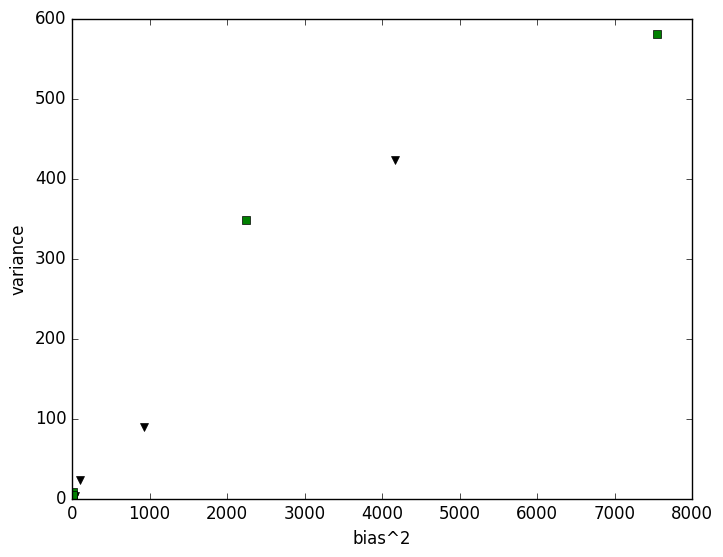

PyObject <matplotlib.text.Text object at 0x7f6a2e381358>

In [46]:
plot(collect(values(sglda_bv[1]))[1:end-3], collect(values(sglda_bv[2]))[1:end-3], "r^")
plot(collect(values(sgrhmc_10_1_bv[1])), collect(values(sgrhmc_10_1_bv[2])), "kv")
plot(collect(values(sgrhmc_10_10_bv[1])), collect(values(sgrhmc_10_10_bv[2])), "gs")
xlabel("bias^2"); ylabel("variance")